# 3. 머신러닝 맛보기2: 회귀문제

## 3-1. 분석 데이터 검토

In [1]:
# 분석데이터(주택가격) 불러와서 데이터 확인
import pandas as pd
data=pd.read_csv('house_price.csv', encoding='utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [2]:
# 행(케이스수)과 열(컬럼수) 구조 확인
print(data.shape)

(17689, 6)


In [3]:
# 변수별 기술통계 확인
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

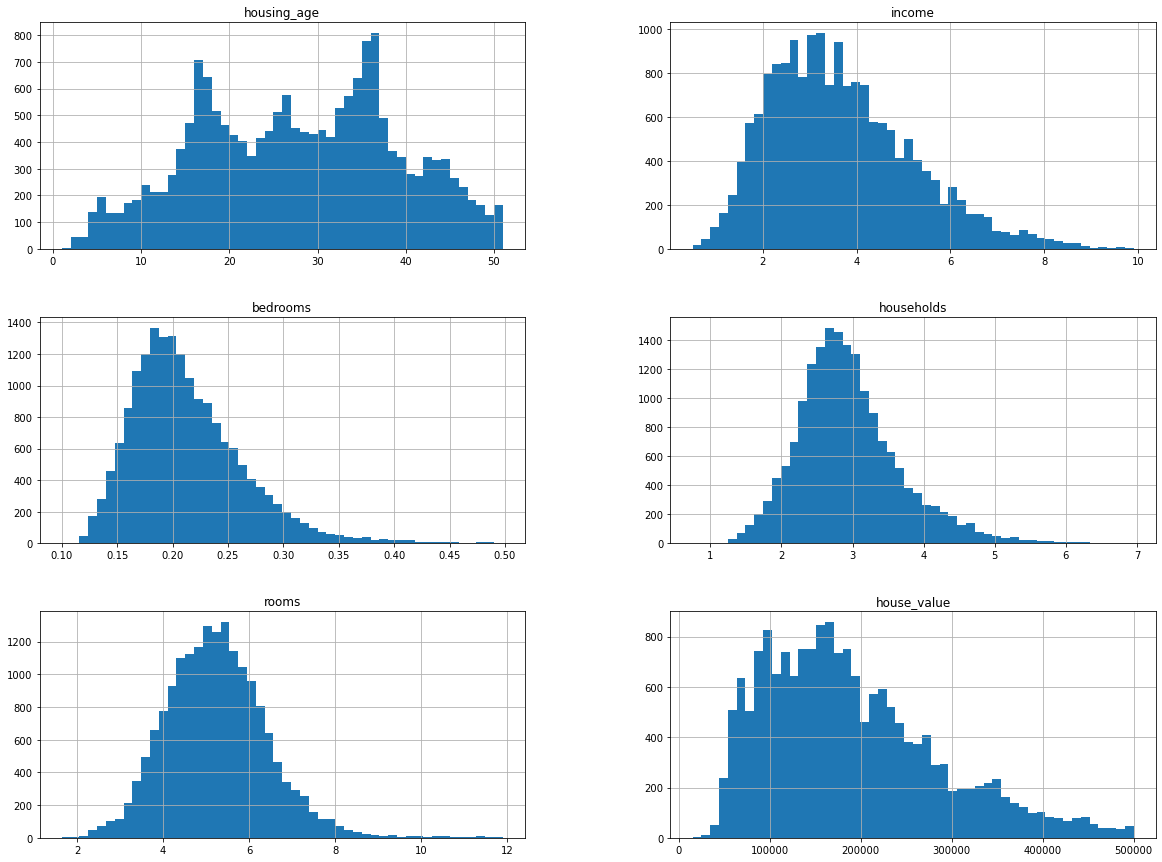

In [4]:
# 변수별 히스토그램 확인
data.hist(bins=50, figsize=(20,15))

## 3-2. 특성(X)과 레이블(y) 나누기

In [5]:
# 방법1: 특성이름으로 특성 데이터셋(X) 나누기
X1=data[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
# 방법2: 특성 위치값으로 특성 데이터셋(X) 나누기
X2=data[data.columns[0:5]]
# 방법3: loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함)
X3=data.loc[:, 'housing_age':'rooms']

In [6]:
# 3가지 방법 모두 동일한 특성치 데이터셋 나눠진 결과 확인
print(X1.shape)
print(X2.shape)
print(X3.shape)

(17689, 5)
(17689, 5)
(17689, 5)


In [7]:
# 레이블 데이터셋 나누기
y=data[["house_value"]]

In [8]:
# 레이블 데이터셋 행, 열 확인
print(y.shape)

(17689, 1)


## 3-3. train-test 데이터셋 나누기

In [9]:
# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X1, y, random_state=42)

In [10]:
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


## 3-4. 정규화

In [11]:
# 특성치(X)의 단위 정규화를 위한 라이브러리 블러오기(min-max, standard 2가지 비교)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 가. train data의 정규화

In [12]:
# min-max 방법으로 정규화
# 주의!: fit은 학습데이터로 해야, 나중에 test 데이터 정규화시 train 데이터의 최대-최소 기준이 적용됨
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)

In [13]:
# standard 방법으로 정규화
# 주의!: fit은 학습데이터로 해야, 나중에 test 데이터 정규화시 train 데이터의 최대-최소 기준이 적용됨
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)

In [14]:
# min-max 방법으로 정규화한 데이터의 기술통계량 확인
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# standard 방법으로 정규화한 데이터의 기술통계량 확인
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,5.615556e-18,1.588508e-16,7.827508e-16,-1.103026e-16,-3.708213e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


### 나. test data의 정규화

In [16]:
# test 데이터에도 정규화 적용 및 데이터 확인: min-max 방법
X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


In [17]:
# test 데이터에도 정규화 적용 및 데이터 확인: standard 방법
X_scaled_standard_test=scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.014279,0.000196,-0.004814,0.040879,0.025222
std,1.013373,1.006675,0.984789,1.039304,1.018846
min,-2.342832,-2.081653,-1.864897,-2.593803,-3.049856
25%,-0.830678,-0.766493,-0.699423,-0.648287,-0.685507
50%,0.058824,-0.139666,-0.190013,-0.109012,-0.029221
75%,0.770426,0.592419,0.516912,0.563130,0.636293
max,2.104679,4.045937,5.352917,5.535878,5.641914


## 3-5. 모델 학습

In [18]:
# ML 알고리즘 모듈 불러오기 및 학습데이터에 적용(LinearRegression)
# 여기서는 min-max 정규화 데이터로 분석
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [19]:
# 회귀 예측 결과(주택가격)을 'pred_train'에 저장(할당), score로 정확도(R-square: 설명력) 확인
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5706921210926263

In [20]:
# 테스트 데이터에 학습데이터의 모델 적용, 'pred_test'에 저장(할당), score로 정확도(R-square: 설명력) 확인
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5826083517811865

In [21]:
# 기타 선형 모델평가지표: RMSE (Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61763.84882543206

In [22]:
# 기타 선형 모델평가지표: MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

46218.35635910518

In [23]:
# 기타 선형 모델평가지표: MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, pred_test)

3814773021.730826

In [24]:
# 기타 선형 모델평가지표: MAPE (Mean Absolute Percentage Error)
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred_test) / y_test)) * 100 
MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

In [25]:
# 기타 선형 모델평가지표: MPE (Mean Percentage Error)
def MAE(y_test, y_pred):
    return np.mean((y_test - pred_test) / y_test) * 100
MAE(y_test, pred_test)

house_value   -12.178049
dtype: float64

## 3-6. 예측값 병합 및 저장

In [26]:
# 학습데이터의 예측값(주택가격) 컬럼을 생성하여 'y_train' 데이터셋에 추가
prob_train=model.predict(X_scaled_minmax_train)
y_train[['y_pred']]=pred_train
y_train

<ipython-input-26-95da034f853a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']]=pred_train
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,house_value,y_pred
17235,56700,30143.543694
14220,101400,199835.492874
3280,271400,272103.037256
15279,88900,28899.099715
14727,95300,113477.567588
...,...,...
11284,142400,115628.685921
11964,134200,77955.022737
5390,225000,137618.822679
860,378200,255862.726626


In [27]:
# 테스트 데이터의 예측값(주택가격) 컬럼을 생성하여 'y_test' 데이터셋에 추가
prob_test=model.predict(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test

<ipython-input-27-8aa333bb6756>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']]=pred_test
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,house_value,y_pred
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [28]:
# 테스트 데이터의 특성치(X_test)와 레이블 및 예측치(y_test)를 병함
Total_test=pd.concat([X_test, y_test], axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [29]:
# csv파일로 내보내기 및 저장
Total_test.to_csv("regression_test.csv")